In [1]:
# 대학평가(kaggle에서 수집한 데이터를 가공하여 실습)
import pandas as pd
df = pd.read_csv("c:/data/school/data.csv")
df.head()


,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1,1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0,1


In [2]:
train_cols = df.columns[:-2] # 마지막 2개 뺌
X = df[train_cols] # 독립변수
y = df["Label"] # 종속변수
y.value_counts()


0    2158
1     445
Name: Label, dtype: int64

In [4]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp=pd.DataFrame(data=X_sample, columns=train_cols)
y_samp=pd.DataFrame(data=y_sample, columns=['Label'])
df_samp=pd.concat([X_samp, y_samp], axis=1)

In [5]:
df_samp["Label"].value_counts()

0    445
1    445
Name: Label, dtype: int64

In [6]:
X=df_samp[train_cols]
y=df_samp["Label"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, stratify=y,random_state=10)


In [8]:
#로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=10,max_iter=1000)
logit.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=10)

In [9]:
print(" 학습용:",logit.score(X_train, y_train))
print(" 검증용:",logit.score(X_test, y_test)) 

 학습용: 0.9915730337078652
 검증용: 1.0


<AxesSubplot:>

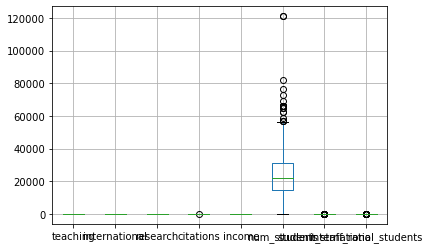

In [10]:
X_train.boxplot()


In [11]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))


<AxesSubplot:>

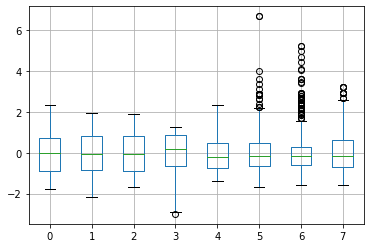

In [12]:
X_train_scaled.boxplot()

In [13]:
#다양한 알고리즘별 정확도를 저장할 리스트
result_tr=[]
result_te=[]

In [14]:

logit=LogisticRegression(random_state=10)
logit.fit(X_train_scaled, y_train)

LogisticRegression(random_state=10)

In [15]:
score_tr=logit.score(X_train_scaled, y_train)
score_te=logit.score(X_test_scaled, y_test)
print(" 학습용:",score_tr) 
print(" 검증용:",score_te) 
result_tr.append(score_tr)
result_te.append(score_te)

 학습용: 0.9887640449438202
 검증용: 0.9943820224719101


In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=10)
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=10)

In [17]:
print(" 학습용:",tree.score(X_train_scaled, y_train))
print(" 검증용:",tree.score(X_test_scaled, y_test)) 

 학습용: 1.0
 검증용: 0.9719101123595506


In [18]:
# max_depth 가지치기
tree = DecisionTreeClassifier(max_depth=4, random_state=10)
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [19]:
score_tr=tree.score(X_train_scaled, y_train)
score_te=tree.score(X_test_scaled, y_test)
print(" 학습용:",score_tr) 
print(" 검증용:",score_te) 
result_tr.append(score_tr)
result_te.append(score_te)

 학습용: 0.9789325842696629
 검증용: 0.9775280898876404


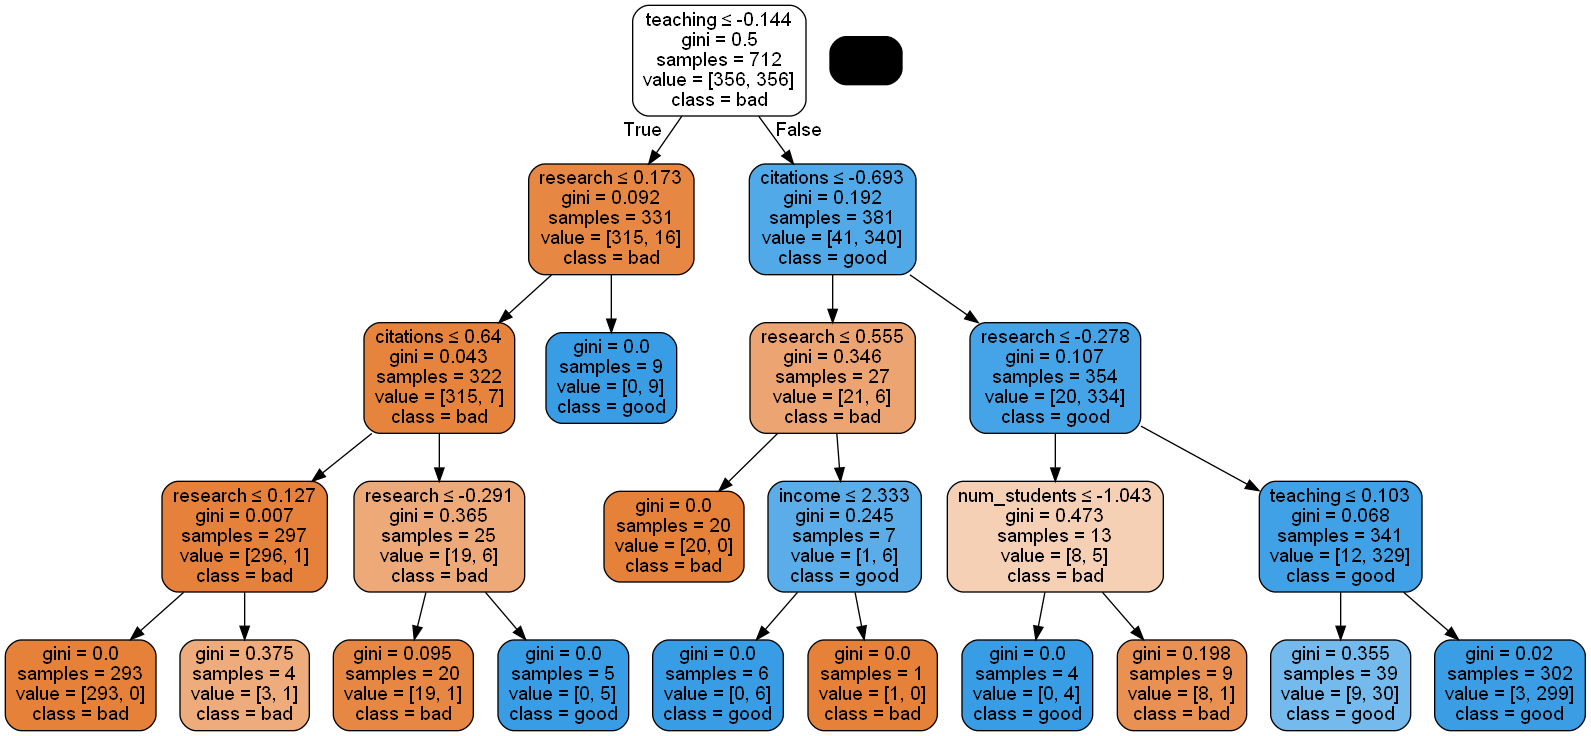

In [20]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_data = export_graphviz(tree, out_file=None, feature_names=train_cols, class_names=["bad","good"], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\anaconda3\lib\site-pa

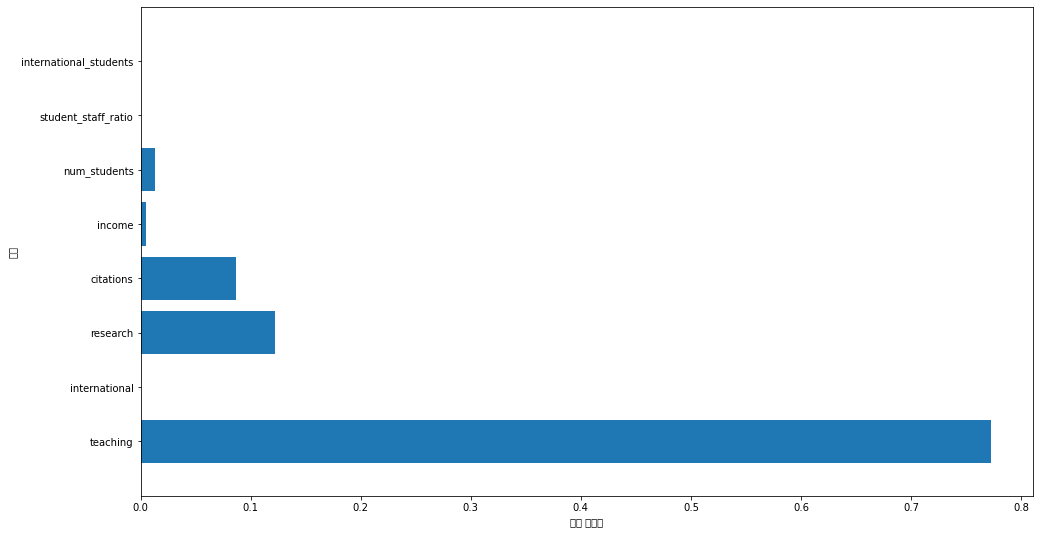

In [21]:
# 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
# 0~1 사이의 값(0 전혀 사용되지 않음 ~1 완벽하게 타겟 클래스 예측)
import numpy as np
import matplotlib.pyplot as plt
def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("특성 중요도") 
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
plot_tree(tree)
# 특성중요도:

In [22]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
#100개의 트리로 구성된 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=100, random_state=10)
forest.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=10)

In [23]:
score_tr=forest.score(X_train_scaled, y_train)
score_te=forest.score(X_test_scaled, y_test)
print(" 학습용:",score_tr)
print(" 검증용:",score_te) 
result_tr.append(score_tr)
result_te.append(score_te)

 학습용: 1.0
 검증용: 0.9943820224719101


c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\anaconda3\lib\site-pa

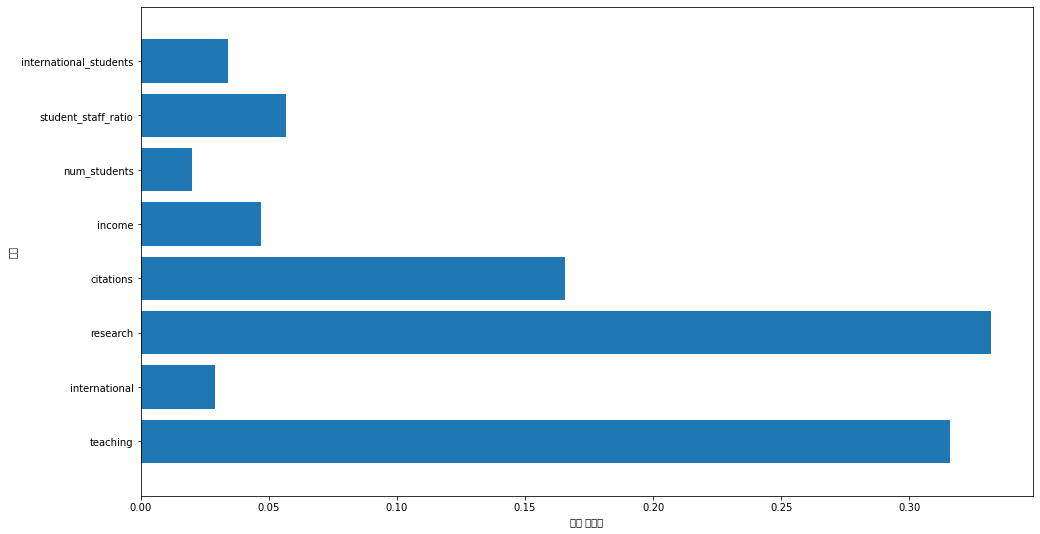

In [24]:
#랜덤 포레스트에서 제공하는 각 트리의 특성 중요도
#랜덤 포레스트는 좀 더 폭넓은 시각으로 데이터를 관찰할 수 있다
plot_tree(forest)
# :

최적의 k: 5
 최적의 정확도: 0.9887640449438202


c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-

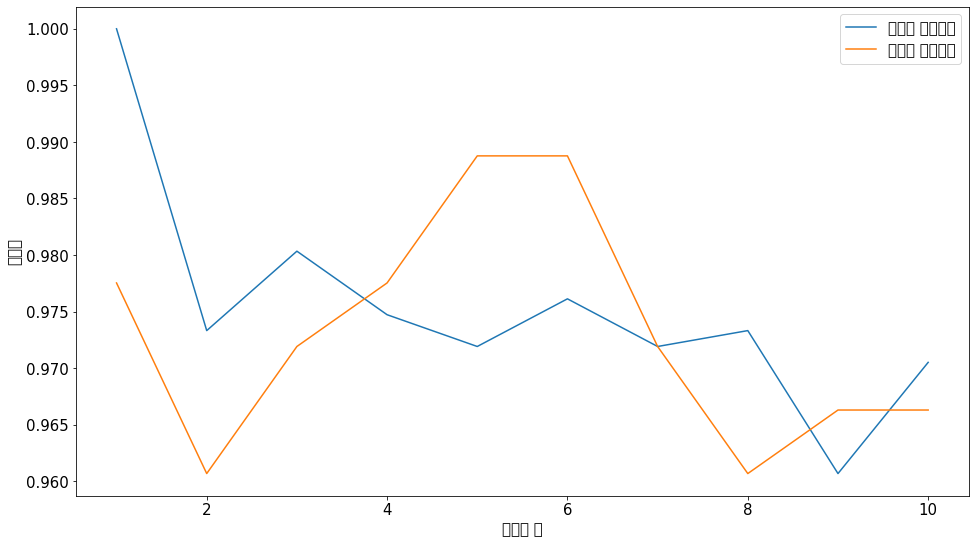

In [25]:
# knn
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
train_rate = []
test_rate = []
# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다
# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함
# 1에서 10까지 n_neighbors를 적용
neighbors = range(1, 11)
for n in neighbors:
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    # 학습용 데이터셋의 정확도
    train_rate.append(knn.score(X_train_scaled, y_train))
    # 검증용 데이터셋의 정확도
    test_rate.append(knn.score(X_test_scaled, y_test))
test_arr=np.array(test_rate) #검증용 데이터셋의 정확도
max_rate=np.max(test_arr) #가장 좋은 정확도
idx=np.where(test_arr == max_rate)[0][0] #가장 성능이 좋은 인덱스
print("최적의 k:",neighbors[idx])
print(" 최적의 정확도:",test_rate[idx]) 
plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label="학습용 데이터셋") 
plt.plot(neighbors, test_rate, label="검증용 데이터셋") 
plt.ylabel("정확도") 
plt.xlabel("이웃의 수") 
plt.legend()
# 학습용 데이터셋의 경우 이웃이 1개일 때 100% 예측
# 이웃의 수가 늘어나면 학습용 데이터셋의 경우 모델이 단순해지고 정확도는 줄어든다.

In [26]:
# n_neighbors=k=이웃의 수
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [27]:
score_tr=knn.score(X_train_scaled, y_train)
score_te=knn.score(X_test_scaled, y_test)
print(" 학습용:",score_tr)
print(" 검증용:",score_te) 
result_tr.append(score_tr)
result_te.append(score_te)

 학습용: 0.9719101123595506
 검증용: 0.9887640449438202


In [28]:
#인공신경망
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=10)
mlp.fit(X_train_scaled, y_train)

c:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=10)

In [29]:
print(" 학습용:",mlp.score(X_train_scaled, y_train))
print(" 검증용:",mlp.score(X_test_scaled, y_test))

 학습용: 0.9943820224719101
 검증용: 0.9943820224719101


In [30]:
# 은닉층을 2개로 늘림
mlp = MLPClassifier(max_iter=1000,hidden_layer_sizes=[100,100],random_state=10)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=[100, 100], max_iter=1000, random_state=10)

In [31]:
score_tr=mlp.score(X_train_scaled, y_train)
score_te=mlp.score(X_test_scaled, y_test)
print(" 학습용:",score_tr)
print(" 검증용:",score_te)
result_tr.append(score_tr)
result_te.append(score_te)

 학습용: 1.0
 검증용: 1.0


In [32]:
# svm
from sklearn.svm import SVC
svm = SVC(random_state=10)
svm.fit(X_train_scaled, y_train)

SVC(random_state=10)

In [33]:
print(" 학습용:",svm.score(X_train_scaled, y_train)) 
print(" 검증용:",svm.score(X_test_scaled, y_test)) 

 학습용: 0.9873595505617978
 검증용: 0.9887640449438202


In [34]:
# 최적의 C value와 gamma value를 찾는 과정
import numpy as np
train_rate = []
test_rate = []
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1]
for n in c_values:
    for g in g_values:
        # 모델 생성
        svm = SVC(C=n,gamma=g,random_state=10)
        svm.fit(X_train_scaled, y_train)
        # 학습용 데이터셋의 정확도
        train_rate.append([n,g,svm.score(X_train_scaled,
        y_train)])
        # 검증용 데이터셋의 정확도
        test_rate.append([n,g,svm.score(X_test_scaled,
        y_test)])


최적의 c: 100
최적의 gamma: 0.01
최적의 정확도: 1.0


c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-

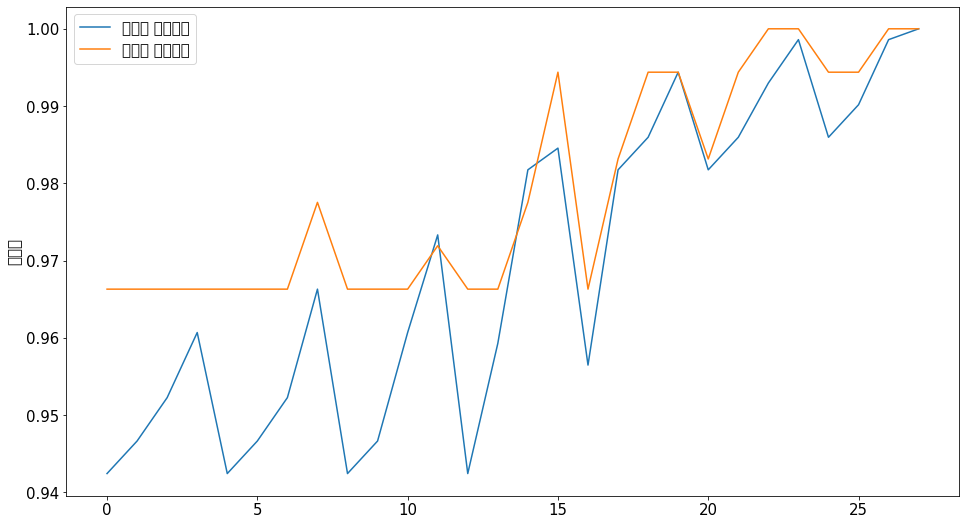

In [35]:
train_arr=np.array(train_rate) # 검증용 데이터셋의 정확도
test_arr=np.array(test_rate) # 검증용 데이터셋의 정확도
max_rate=np.max(test_arr[:,2]) # 가장 좋은 정확도
idx=np.argmax(test_arr[:,2]) # 가장 성능이 좋은 인덱스
print("최적의 c:",test_rate[idx][0])
print("최적의 gamma:",test_rate[idx][1])
print("최적의 정확도:",test_rate[idx][2]) 
plt.rcParams["font.size"]=15
plt.plot(range(len(train_rate)), train_arr[:,2], label="학습용 데이터셋")
plt.plot(range(len(test_rate)), test_arr[:,2], label="검증용 데이터셋")
plt.ylabel("정확도") 
plt.legend()